In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'c:\\Users\\20234364\\group-4\\data'

In [5]:
#showing data info
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
protein_info = pd.read_csv("protein_info.csv")
print("trainset:", '\n', train[:10], '\n', train.describe(), '\n', "length: ", len(train), '\n')
print("testset:", '\n',test[:10], '\n', "length: ", len(test), '\n')
print("protein_info", '\n', protein_info[:10], '\n', "length: ", len(protein_info), '\n')

trainset: 
                                      molecule_SMILES UniProt_ID  \
0  CC1=CC(=C(C=C1)F)NC(=O)NC2=CC=C(C=C2)C3=COC4=C...     Q00535   
1  C1=CC=C2C(=C1)NC3=C(C=CC(=C3)C4=C(C=NC=C4)Cl)C...     P24941   
2             CCN1C2=CC(=C(C=C2C(=O)C3=C1NOC3=O)F)Cl     P11362   
3  C1=CC=C(C=C1)C2=CNC3=NC=C(C=C23)C4=CC(=CC=C4)C...     P49840   
4  C1=CC=C2C(=C1)C(=CN2)C[C@@H](COC3=CN=CC(=C3)C4...     P31749   
5  C1CCC(C1)N2C3=C(C(=N2)C4=CC5=CC=CC=C5N=C4)C(=N...     P35968   
6  C[C@]12[C@H]([C@H](C[C@H](O1)N3C4=CC=CC=C4C5=C...     P00533   
7        C1=CC=C(C(=C1)CC(=O)NC2=CC3=C(C=C2)C=NN3)Cl     P28482   
8  CCCC(=O)NC1=NNC2=C1C=C(C=C2)C3=CN(N=N3)CC4=CC=...     Q7L7X3   
9  CCOC1=C(C(=CC(=N1)NC(=O)CC2=CC(=C(C=C2OC)S(=O)...     Q7L7X3   

   affinity_score  
0            65.2  
1            70.2  
2            64.0  
3            75.2  
4            78.2  
5            67.1  
6            62.7  
7            62.7  
8            62.1  
9            62.1   
        affinity_score
count 

In [6]:
# Extracting data into numpy arrays
train_array = np.array(pd.read_csv("train.csv", sep=',', header=None))
test_array = np.array(pd.read_csv("test.csv", sep=',', header=None))
protein_array = np.array(pd.read_csv("protein_info.csv", sep=',', header=None))

#creating the different lists needed to store the data in
affinity_score = []
index = []
error_sample = []
train_molecule_length = []
test_molecule_length = []
protein_length = []

#extracting the specific data and filtering out erroneous measurements
for sample in range(1, len(train_array)):
    if float(train_array[sample][-1]) < 40:
        print("erroneous samples:", '\n', 
              "index:", sample, '\n', 
              "SMILES: ", train_array[sample][0], '\n', 
              "Uniprot_ID: ", train_array[sample][1], '\n',
              "Affinity score (lower than 40): ", train_array[sample][2], '\n',
              "molecule length: ", len(train_array[sample][0]))
        
        # Storing the erroneous measurements in a seperate list
        error_sample.append([sample, train_array[sample], len(train_array[sample][0])]) 
    else:
        # Appending the right measurements to the index and affinity scores
        index.append(sample)
        affinity_score.append(float(train_array[sample][-1]))

        # Train molecule length storage
        train_molecule_length.append(len(train_array[sample][0]))

# Test molecule length storage
for sample in range(1, len(test_array)):
    test_molecule_length.append(len(test_array[sample][1]))

# Protein length storage
for protein in range(1, len(protein_array)):
    protein_length.append(len(protein_array[protein][2]))

#converting to numpy arrays
affinity_score = np.array(affinity_score)
index = np.array(index)
train_molecule_length = np.array(train_molecule_length)
test_molecule_length = np.array(test_molecule_length)
protein_length = np.array(protein_length)

erroneous samples: 
 index: 11678 
 SMILES:  COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C#N)OCC4=CC=CC=C4S(=O)(=O)C)OC 
 Uniprot_ID:  P49841 
 Affinity score (lower than 40):  1.2 
 molecule length:  64


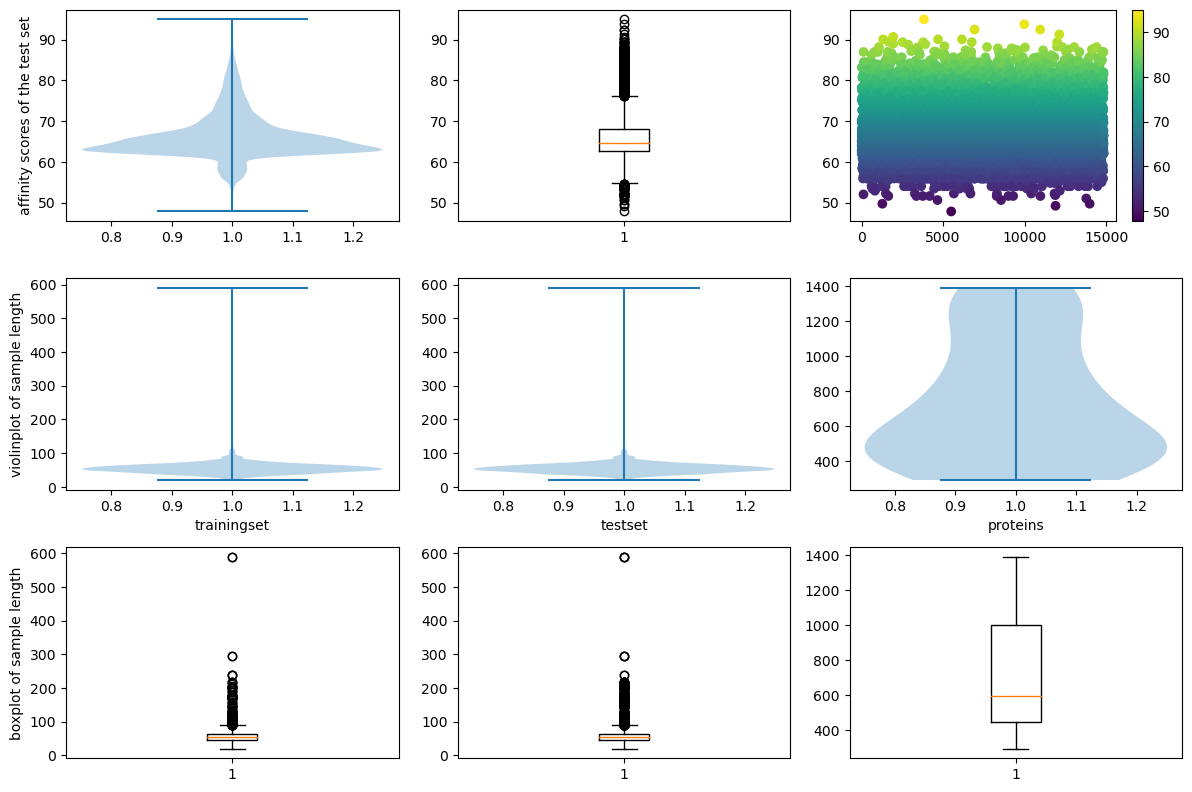

In [7]:
#creating the subplots for every plot in the figure
fig, ([ax11train, ax12train, ax13train], 
      [ax21trainmollenviol, ax22testmollenviol, ax23protlenviol], 
      [ax31trainmollenbox, ax32testmollenbox, ax33protlenbox]) =    plt.subplots(nrows = 3, 
                                                                                ncols = 3,
                                                                                figsize =(12, 8),
                                                                                sharex = False,
                                                                                sharey = False)


#plotting the affinity scores in violinplot, boxplot and scatterplot
ax11train.set_ylabel('affinity scores of the test set')
ax11train.violinplot(affinity_score)
ax12train.boxplot(affinity_score)
sc = ax13train.scatter(index, affinity_score, c= affinity_score, cmap='viridis')
plt.colorbar(sc, ax = ax13train) #adding the colorbar for easier interpretation

#plotting the molecule and protein lengths in violin- and boxplot
ax21trainmollenviol.set_ylabel("violinplot of sample length")
ax31trainmollenbox.set_ylabel("boxplot of sample length")
ax21trainmollenviol.set_xlabel("trainingset")
ax22testmollenviol.set_xlabel("testset")
ax23protlenviol.set_xlabel("proteins")

#assigning the different plots in row 2 and 3
ax21trainmollenviol.violinplot(train_molecule_length)
ax31trainmollenbox.boxplot(train_molecule_length)

ax22testmollenviol.violinplot(test_molecule_length)
ax32testmollenbox.boxplot(test_molecule_length)

ax23protlenviol.violinplot(protein_length)
ax33protlenbox.boxplot(protein_length)

#properly separating the different plots
fig.subplots_adjust(hspace=0.2)
plt.tight_layout(pad=1)
plt.show()